In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
df= pd.read_csv('student_performance.csv')

In [38]:
print(df.head())

   StudyHours  SleepHours  AttendanceRate  PracticeTests  Pass
0           2           5              60              1     0
1           3           6              65              2     0
2           4           6              70              2     0
3           5           7              75              3     0
4           6           7              80              4     1


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   StudyHours      10 non-null     int64
 1   SleepHours      10 non-null     int64
 2   AttendanceRate  10 non-null     int64
 3   PracticeTests   10 non-null     int64
 4   Pass            10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None


In [40]:
print(df.isnull().sum())

StudyHours        0
SleepHours        0
AttendanceRate    0
PracticeTests     0
Pass              0
dtype: int64


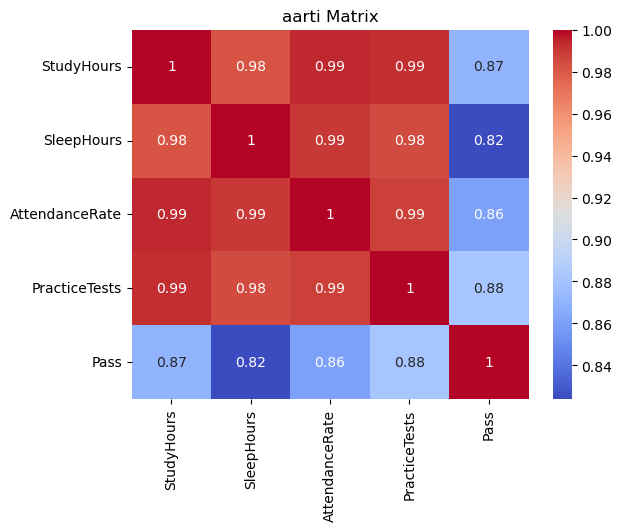

In [41]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlatio Matrix')
plt.show()

In [42]:
x=df.drop('Pass',axis=1)
y=df['Pass']

In [43]:
selector= SelectKBest(score_func=f_classif,k='all')
x_new = selector.fit_transform(x,y)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y, test_size=0.2,random_state = 42)

In [45]:
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [46]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,y_pred))

Accuracy Score 1.0


In [48]:
print('Confusion_Matrix',confusion_matrix(y_test,y_pred))

Confusion_Matrix [[1 0]
 [0 1]]


In [49]:
print('Classification Report',classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

